In [18]:
%matplotlib inline 
import matplotlib.pylab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [25]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-07-01 00:00:00,-0.441629,-0.222957,1.645507
2016-07-01 00:00:01,0.337528,-0.854800,-1.605064
2016-07-01 00:00:02,-0.294939,-0.490131,-0.708214
2016-07-01 00:00:03,1.592733,0.579881,-1.366985
2016-07-01 00:00:04,0.491373,-0.455686,0.319342


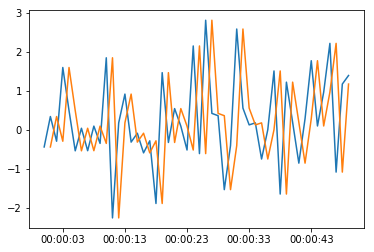

In [26]:
plt.plot(df['A'][:50])
plt.plot(df.shift()['A'][:50])

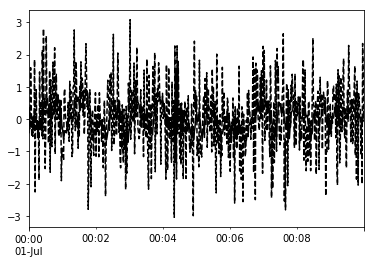

In [27]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df['A'].plot(style = 'k--')
r.mean()['A'].plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\Ruiyao\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=2,adjust=True,span=15).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,0.493470,-0.742765,-0.015936
2016-07-01 00:00:02,-0.638486,-0.409617,-0.062205
2016-07-01 00:00:03,-0.477553,-0.513355,0.180668
2016-07-01 00:00:04,-0.199925,-0.728881,0.002957
2016-07-01 00:00:05,-0.147777,-0.769698,0.205553
2016-07-01 00:00:06,-0.267298,-0.712664,-0.127728
2016-07-01 00:00:07,-0.538060,-0.562277,0.020090
2016-07-01 00:00:08,-0.590392,-0.392374,0.035284
2016-07-01 00:00:09,-0.499952,-0.117867,0.048832


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,-0.260564,-1.439912,0.428285,-0.852183
2016-06-07,0.671679,-0.913193,0.423970,-0.043617
2016-06-08,0.176144,-0.785986,-1.922479,1.083414
2016-06-09,-0.721017,-0.871267,-0.870794,-1.633007
2016-06-10,-0.477609,-0.761400,-0.072552,-1.161601


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000088D028EC88>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000088D1945EB8>], dtype=object)

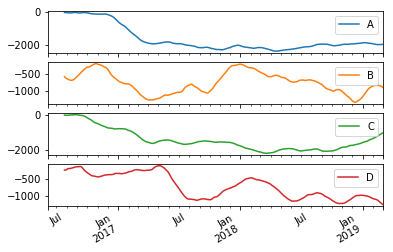

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [28]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean()).head()

,A,B,C
2016-07-01 00:00:00,NaN,NaN,NaN
2016-07-01 00:00:01,NaN,NaN,NaN
2016-07-01 00:00:02,NaN,NaN,NaN
2016-07-01 00:00:03,NaN,NaN,NaN
2016-07-01 00:00:04,NaN,NaN,NaN


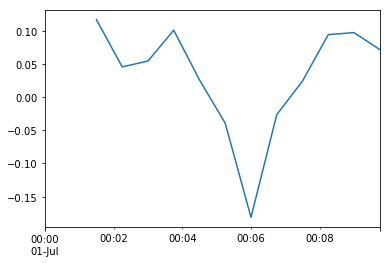

In [31]:
df['A'].resample('45S').mean().rolling(window=3).mean().plot()

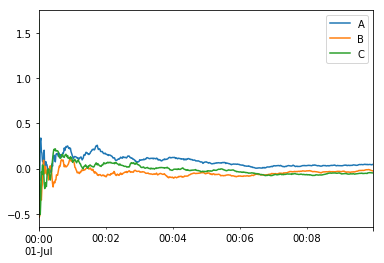

In [32]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]
df.expanding(min_periods = 1).mean().plot()

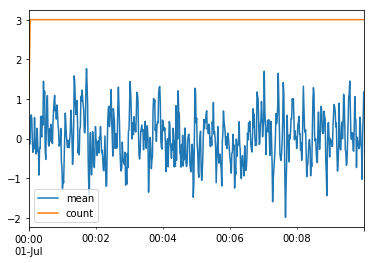

In [33]:
df['A'].rolling(window=3).agg(['mean','count']).plot()

In [11]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

In [12]:
# EWMA
# Why use EWMA?

In [13]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [14]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting